# Imports

In [3]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from collections import deque

# Utils

In [4]:
# Extract nodes and edges count from the graph
def graph_nodes_and_edges(graph):
    nodes = list(graph.keys())
    edges = [(i, j) for i in nodes for j in graph[i]]

    return nodes,edges

In [5]:
# Function to calculating count of edges and nodes
def read_graph(file_path):
    edges = set()
    nodes = set()

    with open(file_path, 'r') as file:
        for line in file:
            node1, node2 = map(int, line.strip().split())
            edges.add((node1, node2))
            nodes.add(node1)
            nodes.add(node2)

    return nodes, edges

# Edges and Nodes

In [6]:
file_path = 'graph3.txt'
nodes, edges = read_graph(file_path)

print("<<Graph3.txt>>")
print(f"Number of Nodes: {len(nodes)}")
print(f"Number of Edges: {len(edges)}")

<<Graph3.txt>>
Number of Nodes: 2708
Number of Edges: 5429


# Erdos-Renyi Graph

In [7]:
# Function to generate an Erdos-Renyi graph
def generate_erdos_renyi_graph(nodes, edges, probability):
    er_graph = {}

    for node in nodes:
        er_graph[node] = set()

    # Generate edges based on Erdos-Renyi model
    for i in nodes:
        for j in nodes:
            if i != j and random.uniform(0, 1) < probability:
                er_graph[i].add(j)
                er_graph[j].add(i)

    return er_graph

In [8]:
erdos_renyi_probability = 0.05

er_graph = generate_erdos_renyi_graph(nodes, edges, erdos_renyi_probability)

er_nodes,er_edges = graph_nodes_and_edges(er_graph)

In [9]:
print("<<Erdos-Reyni Graph>>")
print(f"Number of Nodes: {len(er_nodes)}")
print(f"Number of Edges: {len(er_edges)}")

<<Erdos-Reyni Graph>>
Number of Nodes: 2708
Number of Edges: 713624


# Small-World Graph

In [10]:
def generate_small_world_graph_lattice(nodes, k, beta):
    sw_graph = {}

    # Create a k-regular lattice
    for i in nodes:
        sw_graph[i] = set((i + j) % len(nodes) for j in range(1, k // 2 + 1))

    # Rewire edges to create small-world effect
    for node in nodes:
        for neighbor in list(sw_graph[node]):
            if random.uniform(0, 1) < beta:
                new_neighbor = random.choice(list(nodes - sw_graph[node] - {node}))
                sw_graph[node].remove(neighbor)
                sw_graph[new_neighbor].add(node)
                sw_graph[node].add(new_neighbor)

    return sw_graph

In [53]:
n_sw = set(range(len(nodes)))
k_sw = 4  # Regular lattice degree
beta = 0.2  # Probability of rewiring

sw_graph = generate_small_world_graph_lattice(n_sw, k_sw, beta)
sw_nodes,sw_edges = graph_nodes_and_edges(sw_graph)

In [54]:
print("<<Small_World Graph>>")
print(f"Number of Nodes: {len(sw_nodes)}")
print(f"Number of Edges: {len(sw_edges)}")

<<Small_World Graph>>
Number of Nodes: 2708
Number of Edges: 6562


# Degree Distribution Plot

In [55]:
# Construct the graph from the given nodes and edges
def graph_builder(file_path):
    node, edge = read_graph(file_path)
    graph = {}
    for n in node:
        graph[n] = set()

    for e in edge:
        graph[e[0]].add(e[1])
        graph[e[1]].add(e[0])

    return graph

In [56]:
graph1 = graph_builder('graph1.txt')
graph2 = graph_builder('graph2.txt')
graph3 = graph_builder('graph3.txt')

In [57]:
# Compute the degree distribution
def calculate_degree_distribution(graph):
    degrees = [len(neighbors) for neighbors in graph.values()]
    return degrees

In [64]:
# Plot the degree distribution on a log-log scale
def plot_degree_distribution(degrees,title):
    # bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 30)
    bins = range(max(degrees)+2)
    plt.hist(degrees, bins=bins, log=True, rwidth=0.8)
    plt.title(title)
    # plt.show()

In [65]:
# Calculate the degree distribution
degree1 = calculate_degree_distribution(graph1)
degree2 = calculate_degree_distribution(graph2)
degree3 = calculate_degree_distribution(graph3)
er_degree = calculate_degree_distribution(er_graph)
sw_degree = calculate_degree_distribution(sw_graph)

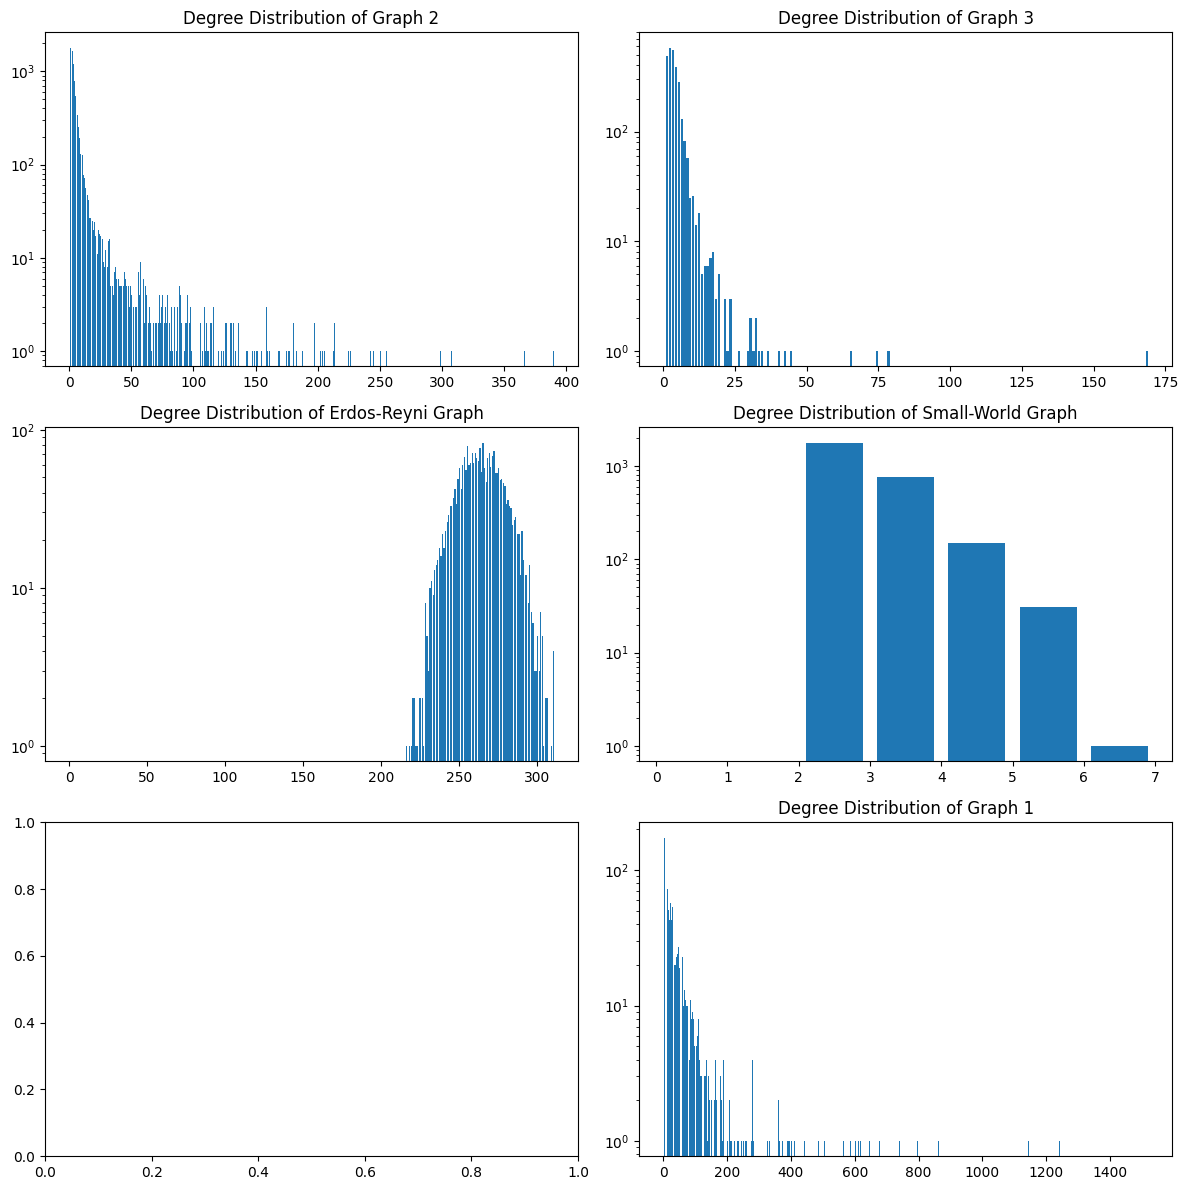

In [79]:
# Create a 2x3 grid for subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot degree distributions and add them to the grid
plot_degree_distribution(degree1, "Degree Distribution of Graph 1")
plt.subplot(3, 2, 1)

plot_degree_distribution(degree2, "Degree Distribution of Graph 2")
plt.subplot(3, 2, 2)

plot_degree_distribution(degree3, "Degree Distribution of Graph 3")
plt.subplot(3, 2, 3)

plot_degree_distribution(er_degree, "Degree Distribution of Erdos-Reyni Graph")
plt.subplot(3, 2, 4)

plot_degree_distribution(sw_degree, "Degree Distribution of Small-World Graph")
plt.subplot(3, 2, 5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Average Path Length Calculation

In [81]:
# Function to load the graph from a file
def load_graph(file_path):
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            # Each line contains two nodes separated by a space, stored as a tuple
            edge = tuple(map(int, line.strip().split()))
            edges.append(edge)
    return edges

In [82]:
# Function to build the adjacency list representation of the graph
def build_adjacency_list(edges, directed=False):
    adjacency_list = {}
    for edge in edges:
        u, v = edge
        # Add nodes and their neighbors to the adjacency list
        if u not in adjacency_list:
            adjacency_list[u] = []
        if v not in adjacency_list:
            adjacency_list[v] = []
        adjacency_list[u].append(v)
        if not directed:
            adjacency_list[v].append(u)  # Include the reverse edge for undirected graphs
    return adjacency_list

In [83]:
# Function to perform Breadth-First Search (BFS) to find shortest paths
def bfs_shortest_paths(graph, start):
    visited = set()
    distances = {start: 0}
    queue = [start]

    while queue:
        current_node = queue.pop(0)
        visited.add(current_node)

        # Traverse neighbors of the current node
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                distances[neighbor] = distances[current_node] + 1

    return distances

In [84]:
# Function to calculate the average path length of the graph
def calculate_avg_path_length(graph, directed=False):
    total_path_length = 0
    total_paths = 0

    # Iterate over each node in the graph
    for node in graph:
        # Find shortest paths from the current node using BFS
        distances = bfs_shortest_paths(graph, node)
        # Accumulate total path length and total number of paths
        total_path_length += sum(distances.values())
        total_paths += len(distances) - 1  # Exclude the node itself

    # Calculate and return the average path length
    avg_path_length = total_path_length / total_paths
    return avg_path_length

In [85]:
# Load graphs edges
edges1 = load_graph('graph1.txt')
edges2 = load_graph('graph2.txt')
edges3 = load_graph('graph3.txt')

In [86]:
# Calculate average path length for undirected graph
print('<<graph1.txt>>')
adjacency_list_undirected = build_adjacency_list(edges1, directed=False)
avg_path_length_undirected = calculate_avg_path_length(adjacency_list_undirected)
print(f'Average Path Length (Undirected): {avg_path_length_undirected}')

# Calculate average path length for directed graph
adjacency_list_directed = build_adjacency_list(edges1, directed=True)
avg_path_length_directed = calculate_avg_path_length(adjacency_list_directed)
print(f'Average Path Length (Directed): {avg_path_length_directed}')

<<graph1.txt>>
Average Path Length (Undirected): 2.66217297116906
Average Path Length (Directed): 1.0


In [87]:
# Calculate average path length for undirected graph
print('<<graph2.txt>>')
adjacency_list_undirected = build_adjacency_list(edges2, directed=False)
avg_path_length_undirected = calculate_avg_path_length(adjacency_list_undirected)
print(f'Average Path Length (Undirected): {avg_path_length_undirected}')

# Calculate average path length for directed graph
adjacency_list_directed = build_adjacency_list(edges2, directed=True)
avg_path_length_directed = calculate_avg_path_length(adjacency_list_directed)
print(f'Average Path Length (Directed): {avg_path_length_directed}')

<<graph2.txt>>
Average Path Length (Undirected): 3.993040941211889
Average Path Length (Directed): 1.0


In [88]:
# Calculate average path length for undirected graph
print('<<graph3.txt>>')
adjacency_list_undirected = build_adjacency_list(edges3, directed=False)
avg_path_length_undirected = calculate_avg_path_length(adjacency_list_undirected)
print(f'Average Path Length (Undirected): {avg_path_length_undirected}')

# Calculate average path length for directed graph
adjacency_list_directed = build_adjacency_list(edges3, directed=True)
avg_path_length_directed = calculate_avg_path_length(adjacency_list_directed)
print(f'Average Path Length (Directed): {avg_path_length_directed}')

<<graph3.txt>>
Average Path Length (Undirected): 6.310310801906627
Average Path Length (Directed): 4.792152144545762


# Diameter Calculation

In [90]:
# Function to calculate the diameter of the graph
def calculate_diameter(graph, directed=False):
    # Function to find the eccentricity of a node using BFS
    def eccentricity(node):
        distances = bfs_shortest_paths(graph, node)
        return max(distances.values())

    # Iterate over each node and find its eccentricity
    eccentricities = [eccentricity(node) for node in graph]

    # The diameter is the maximum eccentricity
    diameter = max(eccentricities)
    return diameter

In [91]:
# Calculate diameter for undirected graph
print('<<graph1.txt>>')
adjacency_list_undirected = build_adjacency_list(edges1, directed=False)
diameter_undirected = calculate_diameter(adjacency_list_undirected)
print(f'Diameter (Undirected): {diameter_undirected}')

# Calculate diameter for directed graph
adjacency_list_directed = build_adjacency_list(edges1, directed=True)
diameter_directed = calculate_diameter(adjacency_list_directed)
print(f'Diameter (Directed): {diameter_directed}')

<<graph1.txt>>
Diameter (Undirected): 6
Diameter (Directed): 1


In [92]:
# Calculate diameter for undirected graph
print('<<graph2.txt>>')
adjacency_list_undirected = build_adjacency_list(edges2, directed=False)
diameter_undirected = calculate_diameter(adjacency_list_undirected)
print(f'Diameter (Undirected): {diameter_undirected}')

# Calculate diameter for directed graph
adjacency_list_directed = build_adjacency_list(edges2, directed=True)
diameter_directed = calculate_diameter(adjacency_list_directed)
print(f'Diameter (Directed): {diameter_directed}')

<<graph2.txt>>
Diameter (Undirected): 8
Diameter (Directed): 1


In [93]:
# Calculate diameter for undirected graph
print('<<graph3.txt>>')
adjacency_list_undirected = build_adjacency_list(edges3, directed=False)
diameter_undirected = calculate_diameter(adjacency_list_undirected)
print(f'Diameter (Undirected): {diameter_undirected}')

# Calculate diameter for directed graph
adjacency_list_directed = build_adjacency_list(edges3, directed=True)
diameter_directed = calculate_diameter(adjacency_list_directed)
print(f'Diameter (Directed): {diameter_directed}')

<<graph3.txt>>
Diameter (Undirected): 19
Diameter (Directed): 15


# Clustering Coefficient Calculation

In [112]:
def calculate_clustering_coefficient(graph):
    clustering_coefficients = {}

    # Function to calculate the number of common neighbors
    def common_neighbors(node1, node2):
        return len(set(graph[node1]) & set(graph[node2]))

    for node in graph:
        neighbors = graph[node]
        num_neighbors = len(neighbors)

        if num_neighbors < 2:
            # Clustering coefficient is undefined for nodes with less than two neighbors
            clustering_coefficients[node] = 0.0
            continue

        # Count the number of triangles centered at the node
        num_triangles = 0

        for i in range(num_neighbors - 1):
            for j in range(i + 1, num_neighbors):
                if neighbors[i] in graph[neighbors[j]]:
                    num_triangles += common_neighbors(neighbors[i], neighbors[j])

        # Calculate the clustering coefficient for the node
        clustering_coefficients[node] = (
            2.0 * num_triangles / (num_neighbors * (num_neighbors - 1))
        )

    # Calculate the average clustering coefficient for the entire graph
    avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(graph)

    return avg_clustering_coefficient, clustering_coefficients

In [113]:
adjacency_list = build_adjacency_list(edges1, directed=False)

# Calculate clustering coefficient
avg_clustering_coefficient, clustering_coefficients = calculate_clustering_coefficient(adjacency_list)

# Print results
print('<<graph1.txt>>')
print(f'Average Clustering Coefficient: {avg_clustering_coefficient}')
print('Individual Clustering Coefficients:')
for node, coefficient in clustering_coefficients.items():
    print(f'Node {node}: {coefficient}')

<<graph1.txt>>
Average Clustering Coefficient: 0.0
Individual Clustering Coefficients:
Node 0: 0.0
Node 6205: 0.0
Node 9039: 0.0
Node 9219: 0.0
Node 8268: 0.0
Node 6208: 0.0
Node 6304: 0.0
Node 7720: 0.0
Node 8991: 0.0
Node 7316: 0.0
Node 7826: 0.0
Node 6078: 0.0
Node 7705: 0.0
Node 7596: 0.0
Node 6944: 0.0
Node 8010: 0.0
Node 7711: 0.0
Node 7235: 0.0
Node 8932: 0.0
Node 8881: 0.0
Node 6132: 0.0
Node 6525: 0.0
Node 9096: 0.0
Node 8986: 0.0
Node 6824: 0.0
Node 9123: 0.0
Node 7675: 0.0
Node 6492: 0.0
Node 6040: 0.0
Node 6881: 0.0
Node 7602: 0.0
Node 7514: 0.0
Node 6070: 0.0
Node 6071: 0.0
Node 6219: 0.0
Node 8935: 0.0
Node 9003: 0.0
Node 6260: 0.0
Node 6540: 0.0
Node 9224: 0.0
Node 6880: 0.0
Node 8019: 0.0
Node 7255: 0.0
Node 6955: 0.0
Node 6679: 0.0
Node 8084: 0.0
Node 9081: 0.0
Node 9245: 0.0
Node 8992: 0.0
Node 6762: 0.0
Node 7210: 0.0
Node 6286: 0.0
Node 7270: 0.0
Node 6065: 0.0
Node 1: 0.0
Node 7533: 0.0
Node 9031: 0.0
Node 7538: 0.0
Node 8222: 0.0
Node 6650: 0.0
Node 6707: 0.0
Node

In [114]:
adjacency_list = build_adjacency_list(edges2, directed=False)

# Calculate clustering coefficient
avg_clustering_coefficient, clustering_coefficients = calculate_clustering_coefficient(adjacency_list)

# Print results
print('<<graph2.txt>>')
print(f'Average Clustering Coefficient: {avg_clustering_coefficient}')
print('Individual Clustering Coefficients:')
for node, coefficient in clustering_coefficients.items():
    print(f'Node {node}: {coefficient}')

<<graph2.txt>>
Average Clustering Coefficient: 0.0
Individual Clustering Coefficients:
Node 0: 0.0
Node 10746: 0.0
Node 10759: 0.0
Node 10734: 0.0
Node 10741: 0.0
Node 10762: 0.0
Node 10725: 0.0
Node 10724: 0.0
Node 10726: 0.0
Node 10757: 0.0
Node 10744: 0.0
Node 10752: 0.0
Node 10722: 0.0
Node 10749: 0.0
Node 10711: 0.0
Node 10761: 0.0
Node 10731: 0.0
Node 10764: 0.0
Node 10730: 0.0
Node 10755: 0.0
Node 10756: 0.0
Node 10750: 0.0
Node 10723: 0.0
Node 10751: 0.0
Node 10767: 0.0
Node 10729: 0.0
Node 10738: 0.0
Node 10712: 0.0
Node 10748: 0.0
Node 10763: 0.0
Node 10719: 0.0
Node 10717: 0.0
Node 10733: 0.0
Node 10768: 0.0
Node 10760: 0.0
Node 10739: 0.0
Node 10765: 0.0
Node 10766: 0.0
Node 10710: 0.0
Node 10716: 0.0
Node 10742: 0.0
Node 10708: 0.0
Node 10732: 0.0
Node 10745: 0.0
Node 10754: 0.0
Node 10720: 0.0
Node 10747: 0.0
Node 10743: 0.0
Node 10727: 0.0
Node 10715: 0.0
Node 10737: 0.0
Node 10721: 0.0
Node 10718: 0.0
Node 10736: 0.0
Node 10713: 0.0
Node 10706: 0.0
Node 10709: 0.0
Node 

In [115]:
adjacency_list = build_adjacency_list(edges3, directed=False)

# Calculate clustering coefficient
avg_clustering_coefficient, clustering_coefficients = calculate_clustering_coefficient(adjacency_list)

# Print results
print('<<graph3.txt>>')
print(f'Average Clustering Coefficient: {avg_clustering_coefficient}')
print('Individual Clustering Coefficients:')
for node, coefficient in clustering_coefficients.items():
    print(f'Node {node}: {coefficient}')

<<graph3.txt>>
Average Clustering Coefficient: 0.6255202404455463
Individual Clustering Coefficients:
Node 35: 0.01944209636517329
Node 1033: 0.6
Node 103482: 0.13333333333333333
Node 103515: 0.32727272727272727
Node 1050679: 0.16666666666666666
Node 1103960: 0.8
Node 1103985: 10.0
Node 1109199: 0.3333333333333333
Node 1112911: 1.3333333333333333
Node 1113438: 0.8
Node 1113831: 0.6666666666666666
Node 1114331: 1.7
Node 1117476: 3.0
Node 1119505: 0.0
Node 1119708: 2.1
Node 1120431: 0.16666666666666666
Node 1123756: 1.6666666666666667
Node 1125386: 0.0
Node 1127430: 12.0
Node 1127913: 3.6666666666666665
Node 1128204: 0.0
Node 1128227: 0.3333333333333333
Node 1128314: 2.0
Node 1128453: 3.1666666666666665
Node 1128945: 0.0
Node 1128959: 0.0
Node 1128985: 0.16666666666666666
Node 1129018: 0.0
Node 1129027: 12.0
Node 1129573: 2.0
Node 1129683: 2.0
Node 1129778: 2.0
Node 1130847: 4.666666666666667
Node 1130856: 10.0
Node 1131116: 0.8333333333333334
Node 1131360: 1.6666666666666667
Node 113155

In [116]:
adjacency_list = build_adjacency_list(er_edges, directed=False)

# Calculate clustering coefficient
avg_clustering_coefficient, clustering_coefficients = calculate_clustering_coefficient(adjacency_list)

# Print results
print('<<Erdos-Reyni>>')
print(f'Average Clustering Coefficient: {avg_clustering_coefficient}')
print('Individual Clustering Coefficients:')
for node, coefficient in clustering_coefficients.items():
    print(f'Node {node}: {coefficient}')

<<Erdos-Reyni>>
Average Clustering Coefficient: 2.584558289241939
Individual Clustering Coefficients:
Node 1122304: 2.4601083974967093
Node 66563: 2.5921335571383204
Node 1129994: 2.548258091115234
Node 682508: 2.592055267702936
Node 35343: 2.526079065730293
Node 1135122: 2.7149591565007736
Node 1135125: 2.6125891068350184
Node 8213: 2.57488138708796
Node 94229: 2.655056421022497
Node 31769: 2.541929746554024
Node 696346: 2.643707362973418
Node 1125402: 2.58394901584795
Node 628764: 2.6172843110066704
Node 1131550: 2.6353383164403397
Node 521252: 2.617059891107078
Node 27174: 2.6320320575449925
Node 178727: 2.611849312766744
Node 1114153: 2.552147617396664
Node 1112106: 2.589126559714795
Node 385067: 2.6086221166648675
Node 1132073: 2.5907931738510728
Node 131117: 2.6095410388216003
Node 107569: 2.616688510266492
Node 714289: 2.5408135629942583
Node 1104435: 2.6374342947570995
Node 6196: 2.660982866132542
Node 75318: 2.646652583685408
Node 1129015: 2.6002367552075762
Node 1125944: 2.57

In [117]:
adjacency_list = build_adjacency_list(sw_edges, directed=False)

# Calculate clustering coefficient
avg_clustering_coefficient, clustering_coefficients = calculate_clustering_coefficient(adjacency_list)

# Print results
print('<<Small-World>>')
print(f'Average Clustering Coefficient: {avg_clustering_coefficient}')
print('Individual Clustering Coefficients:')
for node, coefficient in clustering_coefficients.items():
    print(f'Node {node}: {coefficient}')

<<Small-World>>
Average Clustering Coefficient: 0.3364987445674296
Individual Clustering Coefficients:
Node 0: 0.06666666666666667
Node 1: 0.047619047619047616
Node 2027: 0.2
Node 870: 0.0
Node 3: 0.16666666666666666
Node 852: 0.08333333333333333
Node 1990: 0.1
Node 2: 0.16666666666666666
Node 123: 0.1
Node 4: 0.1
Node 5: 0.6666666666666666
Node 929: 0.05555555555555555
Node 562: 0.0
Node 6: 1.0
Node 7: 0.6666666666666666
Node 8: 0.6666666666666666
Node 9: 0.14285714285714285
Node 10: 0.26666666666666666
Node 476: 0.06666666666666667
Node 1526: 0.09523809523809523
Node 2010: 0.16666666666666666
Node 11: 1.0
Node 12: 0.2
Node 13: 0.14285714285714285
Node 14: 0.030303030303030304
Node 1957: 0.1
Node 340: 0.03571428571428571
Node 1005: 0.0
Node 836: 0.2
Node 2249: 0.0
Node 715: 0.2
Node 781: 0.022222222222222223
Node 15: 0.0
Node 16: 0.1
Node 17: 0.16666666666666666
Node 2098: 0.3333333333333333
Node 488: 0.14285714285714285
Node 2264: 0.06666666666666667
Node 18: 0.1
Node 1704: 0.0833333